In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import to_categorical
from PIL import Image
import visualkeras
from PIL import ImageFont

In [2]:
df =  pd.read_csv('../01.balanced_data.csv') 

In [3]:
df.shape

(46935, 2353)

In [4]:
df.sample(20)

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
27312,141,115,135,143,117,141,146,122,146,150,...,136,110,119,132,106,114,109,84,96,2
26728,132,85,90,148,101,108,155,111,120,156,...,158,118,129,156,112,121,151,103,111,2
15447,196,145,162,205,155,170,213,162,176,220,...,222,178,182,218,172,174,205,156,159,0
32020,202,180,205,207,184,211,217,201,227,219,...,214,190,214,208,180,204,207,176,202,3
17814,182,175,190,183,179,194,186,181,195,187,...,185,178,191,184,178,189,182,175,185,1
18715,183,154,176,184,153,173,187,162,184,177,...,58,71,205,58,74,206,70,78,198,1
43654,0,0,0,0,0,0,3,3,1,7,...,10,9,6,2,3,1,0,0,0,6
885,79,54,51,102,74,68,122,95,87,133,...,87,62,69,90,63,67,80,55,56,2
4128,226,140,146,230,145,155,230,142,144,228,...,229,158,164,225,153,157,224,152,156,4
1205,225,198,213,228,199,214,231,202,215,229,...,226,195,208,221,189,198,220,189,200,3


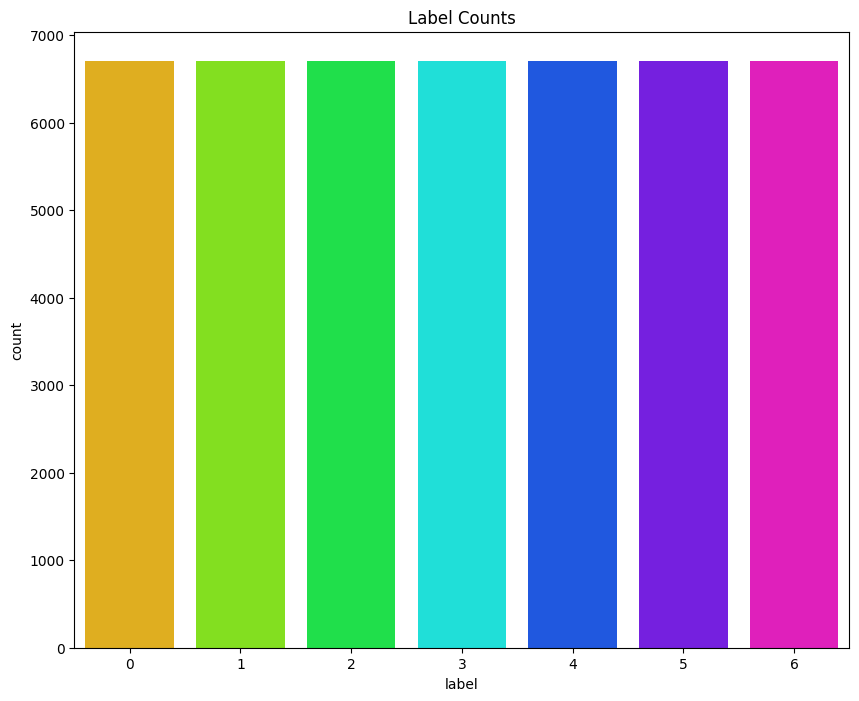

In [5]:
# Count the occurrences of each unique label
label_counts = df['label'].value_counts()

# Create a DataFrame from these counts
label_counts_df = pd.DataFrame({'label': label_counts.index, 'count': label_counts.values})

# Create a color palette
palette = sns.color_palette('hsv', len(label_counts_df))

# Plot the counts
plt.figure(figsize=(10, 8))
sns.barplot(data=label_counts_df, x='label', y='count', palette=palette)
plt.title('Label Counts')
plt.show()

In [6]:
# Split the DataFrame into features and labels
X = df.drop('label', axis=1)
y = df['label']

In [7]:
# Normalize the features
X = X / 255.0

In [8]:
# Assuming the images are 28x28 pixels and have 3 color channels
X = np.array(X).reshape(-1, 28, 28, 3)

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#model_1, Because Input shape just have 28x28, so we need simple model
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [11]:
tf.keras.utils.plot_model(model, show_shapes = True, show_dtype = True, show_layer_names = True, rankdir="TB", expand_nested = True, dpi = 100) # ,to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [12]:
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_loss', mode='max',
                                                 verbose=0)
File = 'SkinDiseases'
callback = [Checkpoint, 
             tf.keras.callbacks.EarlyStopping(patience = 10, monitor= "val_accuracy",verbose=1),
             tf.keras.callbacks.TensorBoard(log_dir = "logs/{}".format(File))]

In [13]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    y_train,
                    validation_split=0.25,
                    batch_size = 128,
                    epochs = 100,
                    callbacks=[callback])

Epoch 1/100
221/221 [==============================] - 6s 12ms/step - loss: 1.5846 - accuracy: 0.3480 - val_loss: 1.3501 - val_accuracy: 0.4630
Epoch 2/100
221/221 [==============================] - 2s 10ms/step - loss: 1.1311 - accuracy: 0.5582 - val_loss: 1.1336 - val_accuracy: 0.5299
Epoch 3/100
221/221 [==============================] - 2s 10ms/step - loss: 0.8552 - accuracy: 0.6736 - val_loss: 0.7634 - val_accuracy: 0.7119
Epoch 4/100
221/221 [==============================] - 2s 10ms/step - loss: 0.6385 - accuracy: 0.7630 - val_loss: 0.5530 - val_accuracy: 0.7929
Epoch 5/100
221/221 [==============================] - 2s 10ms/step - loss: 0.4949 - accuracy: 0.8148 - val_loss: 0.5204 - val_accuracy: 0.8008
Epoch 6/100
221/221 [==============================] - 2s 10ms/step - loss: 0.3997 - accuracy: 0.8527 - val_loss: 0.4137 - val_accuracy: 0.8392
Epoch 7/100
221/221 [==============================] - 2s 10ms/step - loss: 0.3130 - accuracy: 0.8833 - val_loss: 0.2949 - val_accuracy:

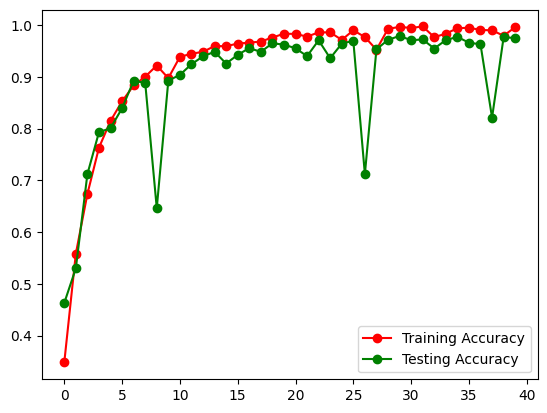

In [14]:
plt.plot(history.history["accuracy"] , 'ro-' , label = "Training Accuracy")
plt.plot(history.history["val_accuracy"] , 'go-' , label = "Testing Accuracy")
plt.legend()
plt.show()

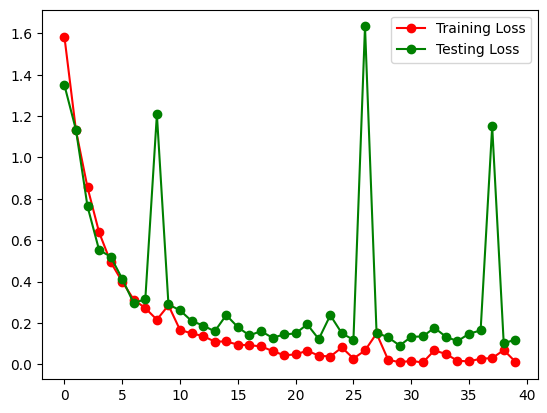

In [15]:
plt.plot(history.history["loss"] , 'ro-' , label = "Training Loss")
plt.plot(history.history["val_loss"] , 'go-' , label = "Testing Loss")
plt.legend()
plt.show()

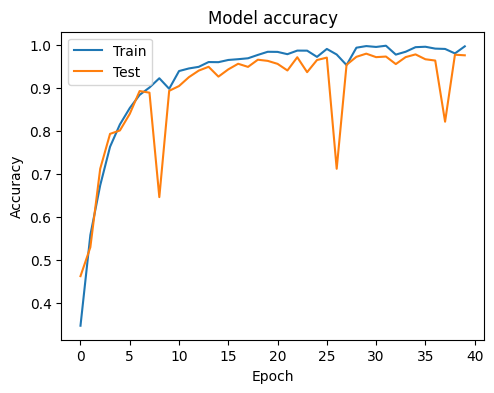

In [16]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

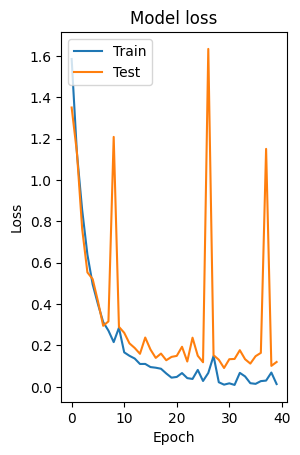

In [17]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

294/294 [==============================] - 1s 3ms/step


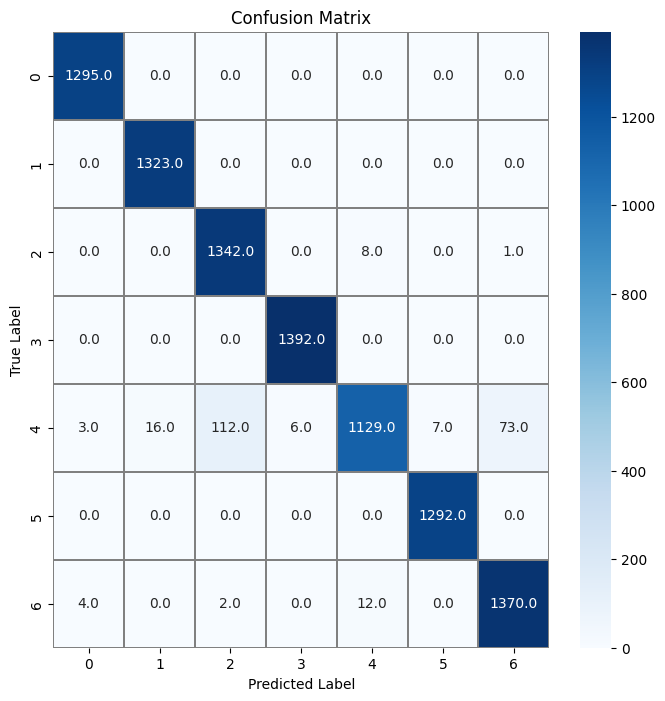

In [18]:

# Predict the values from the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes) 

# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [19]:
classes = {4: ('nv', ' melanocytic nevi'), 
           6: ('mel', 'melanoma'), 
           2 :('bkl', 'benign keratosis-like lesions'), 
           1:('bcc' , ' basal cell carcinoma'), 
           5: ('vasc', ' pyogenic granulomas and hemorrhage'), 
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  
           3: ('df', 'dermatofibroma')}

In [20]:
# Predict the values from the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)

target_names = [f"{classes[i]}" for i in range(7)]
print(classification_report(y_test, y_pred_classes, target_names=target_names))

294/294 [==============================] - 1s 2ms/step
                                                               precision    recall  f1-score   support

('akiec', 'Actinic keratoses and intraepithelial carcinomae')       0.99      1.00      1.00      1295
                             ('bcc', ' basal cell carcinoma')       0.99      1.00      0.99      1323
                     ('bkl', 'benign keratosis-like lesions')       0.92      0.99      0.96      1351
                                     ('df', 'dermatofibroma')       1.00      1.00      1.00      1392
                                  ('nv', ' melanocytic nevi')       0.98      0.84      0.91      1346
              ('vasc', ' pyogenic granulomas and hemorrhage')       0.99      1.00      1.00      1292
                                          ('mel', 'melanoma')       0.95      0.99      0.97      1388

                                                     accuracy                           0.97      9387
                

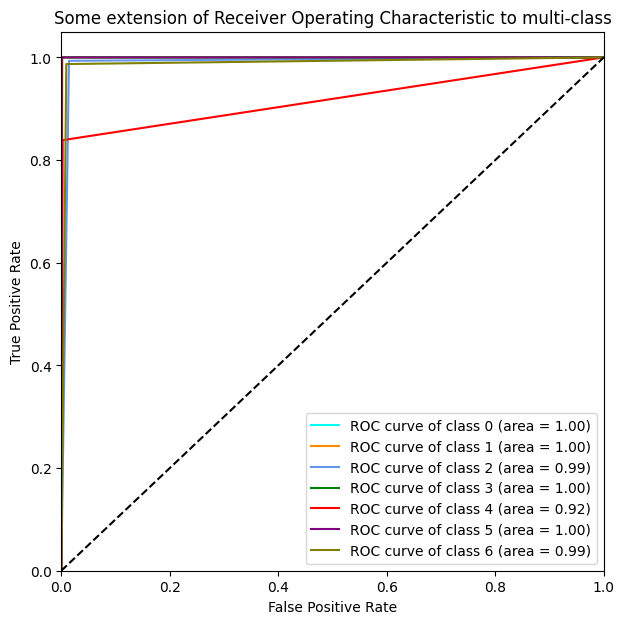

In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from itertools import cycle


# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
y_pred_bin = label_binarize(y_pred_classes, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(7, 7))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'olive'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver Operating Characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [22]:
model.load_weights('best_model.h5')

In [23]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)

294/294 - 1s - loss: 0.1208 - accuracy: 0.9740 - 979ms/epoch - 3ms/step


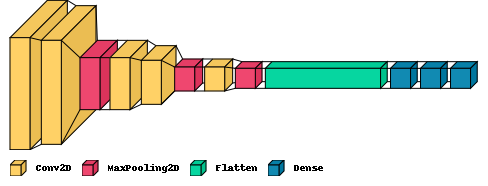

In [24]:
font = ImageFont.load_default()
visualkeras.layered_view(model, legend=True, font=font,to_file='output.png')  # font is optional!